In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [6]:
@staticmethod
def factor(df, period=14):
    delta = df['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.ewm(alpha=1/period, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/period, adjust=False).mean()
    rs = avg_gain / avg_loss.replace([np.inf, -np.inf], np.nan).fillna(0)
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.016044
   Rank_IC (Spearman): -0.036466
📊 信息比率:
   IR: 0.232400
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131034
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


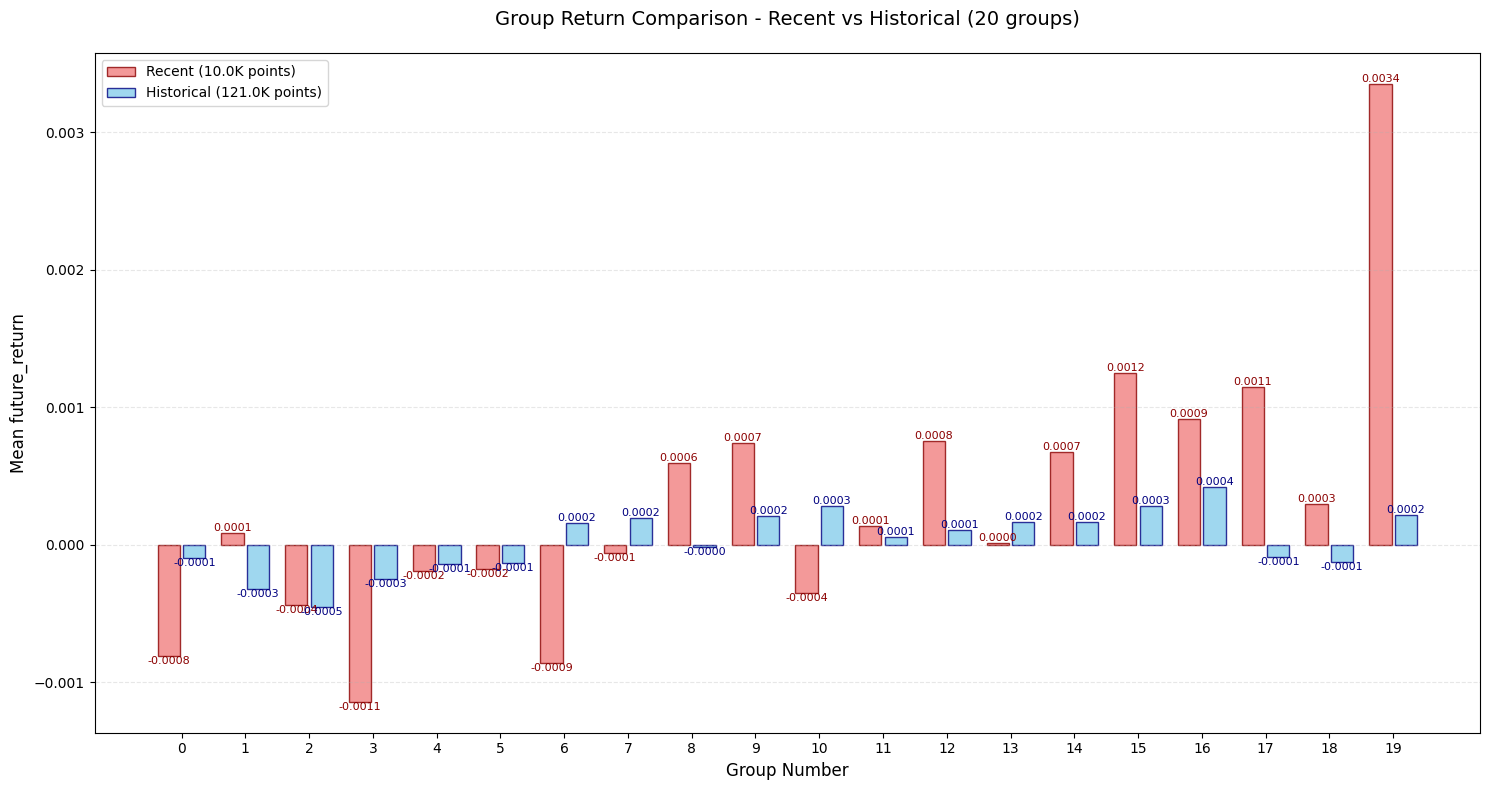

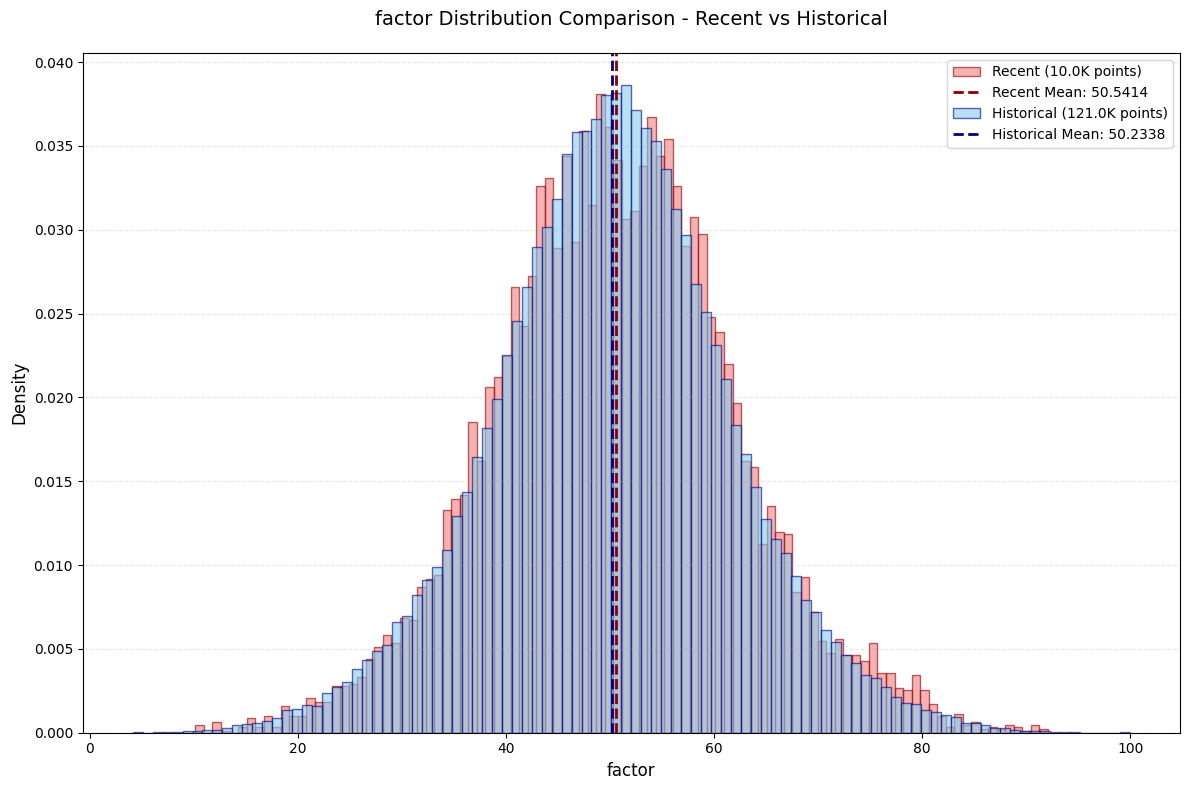

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [7]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

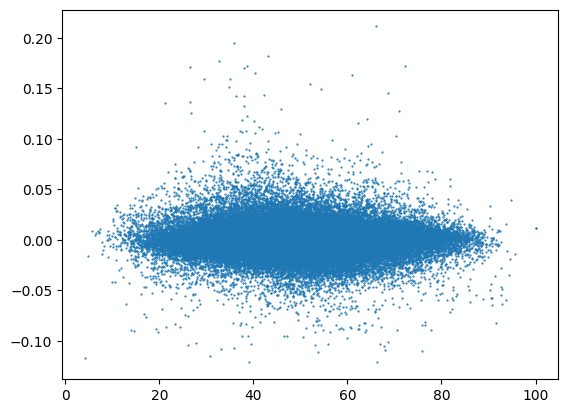

In [8]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [9]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[-0.004040933450592956,
 0.0012494114219434717,
 -0.001852853988943231,
 0.007560153838845039,
 0.003029204953455601,
 -0.009498291450314722,
 1.6519274345326214e-05,
 0.009039093438735525,
 -0.01566395405850142,
 0.0482862803012264]

In [10]:
print(result)

{'correlation_analysis': {'IC': 0.016044216987160187, 'Rank_IC': -0.0364664320142514}, 'information_ratio': {'IR': 0.23240013573959248, 'group_correlations': [-0.004040933450592956, 0.0012494114219434717, -0.001852853988943231, 0.007560153838845039, 0.003029204953455601, -0.009498291450314722, 1.6519274345326214e-05, 0.009039093438735525, -0.01566395405850142, 0.0482862803012264], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       4.1297  31.2604   25.9305      -0.0001      0.0156   6552
1      31.2618  35.9954   33.8452      -0.0003      0.0142   6552
2      35.9960  38.9445   37.5563      -0.0005      0.0135   6551
3      38.9449  41.1870   40.1178      -0.0003      0.0122   6552
4      41.1872  43.0331   42.1392      -0.0001      0.0116   6552
5      43.0335  44.6867   43.8776      -0.0001      0.0112   6551
6      44.6868  46.1970   45.4603    